<a href="https://colab.research.google.com/github/MaiPri/techlabs_group_3_clownfishes/blob/main/Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter # for Pareto Chart

In [ ]:
df = pd.read_csv("./sample_data/charging_data.csv")

In [ ]:
#Here I tried to make a Pareto Chart of the 20% Companies that have 80% of the total number of charging stations

#create a new df with only the data I need
newdf = df.groupby("betreiber")["anzahl_ladepunkte"].sum().sort_values(ascending=False).to_frame()

In [ ]:
#calculate the cummulative percentage
newdf["cum_percentage"] = round(newdf["anzahl_ladepunkte"].cumsum()/newdf["anzahl_ladepunkte"].sum()*100,2)
newdf

,anzahl_ladepunkte,cum_percentage
betreiber,,
EnBW mobility+ AG und Co.KG,4064,5.70
E.ON Drive GmbH,2789,9.62
EWE Go GmbH,1806,12.15
Mercedes-Benz AG,1621,14.43
Westenergie Metering GmbH,1514,16.55
...,...,...
Autohaus Müller Reudnitz GmbH,1,99.99
Genusshotel Wenisch GmbH & Co. KG,1,100.00
Geo4mation GmbH,1,100.00


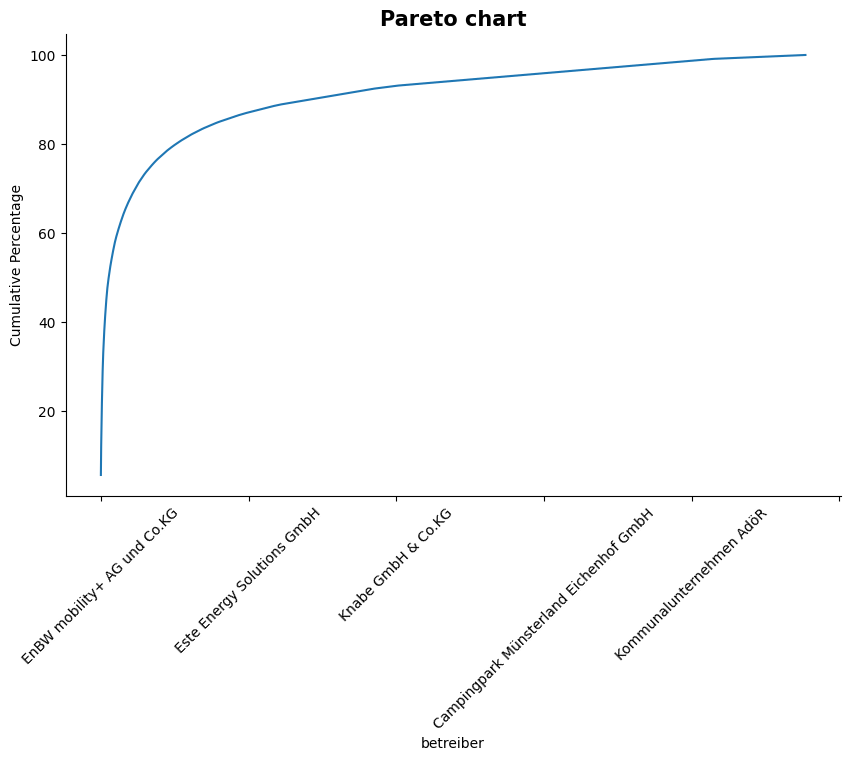

In [ ]:
#plot chart

newdf['cum_percentage'].plot(kind='line', figsize=(10, 6))
plt.title('Pareto chart',fontdict={"fontweight":"bold","fontsize":15})
plt.ylabel("Cumulative Percentage")
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
#plt.bar(newdf.index, newdf["anzahl_ladepunkte"])

Text(0, 0.5, 'Cumulative Percentage')

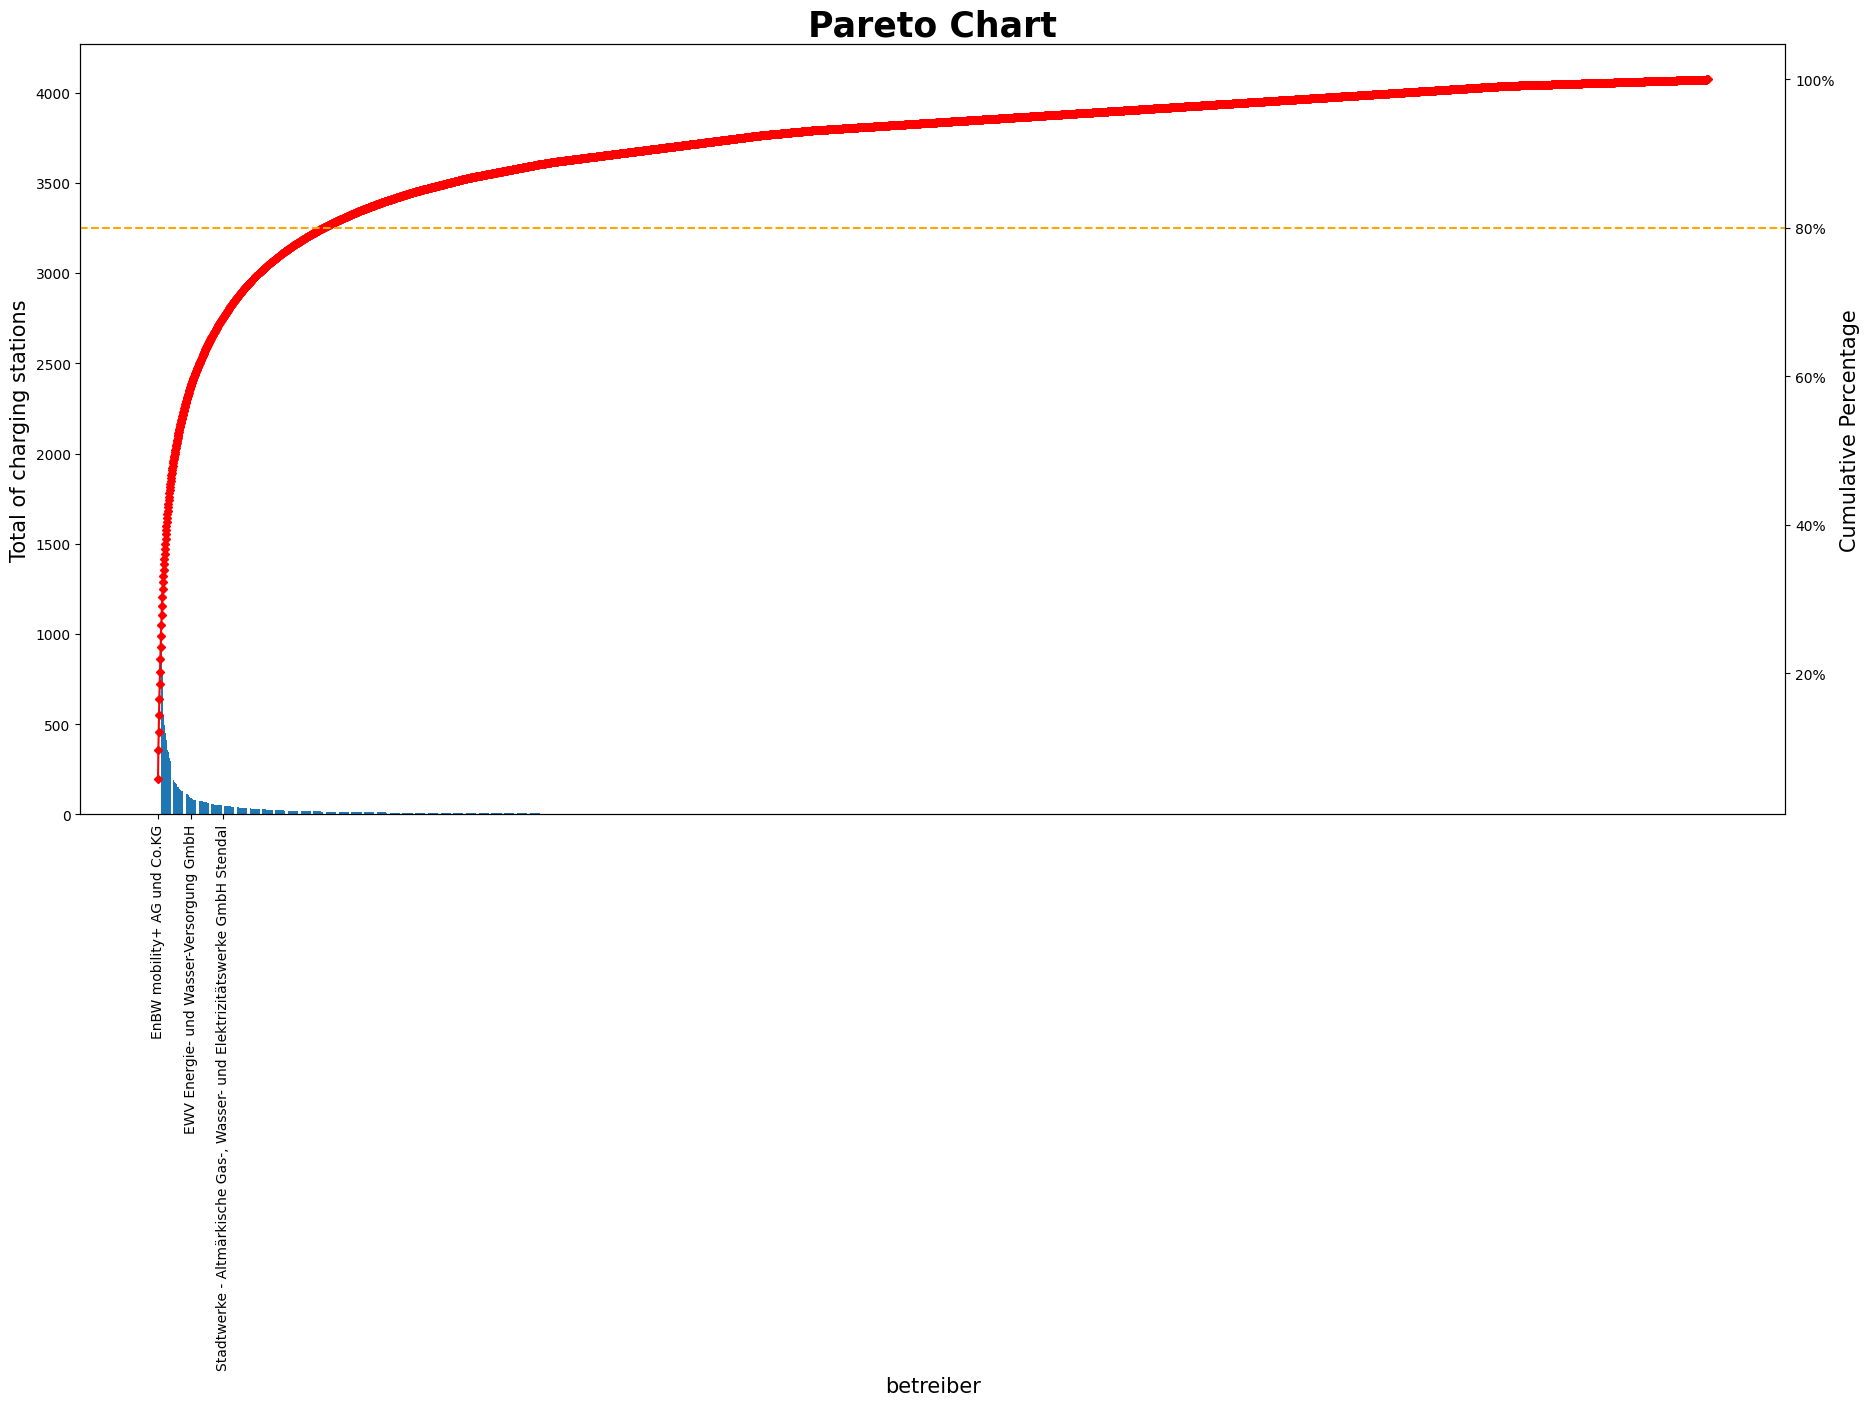

In [ ]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(newdf.index, newdf["anzahl_ladepunkte"])
ax.set_title("Pareto Chart",fontdict={"fontweight":"bold","fontsize":25})
ax.set_xlabel("betreiber",fontdict={"fontsize":15})
#plt.xticks(visible=False) #if I don't want to see the x values
plt.xticks(rotation=90)
ax.set(xticks=([0, 100, 200])) # indexes
ax.set_ylabel("Total of charging stations",fontdict={"fontsize":15})

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(newdf.index, newdf["cum_percentage"], color="red", marker="D", ms=4)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage",fontdict={"fontsize":15})

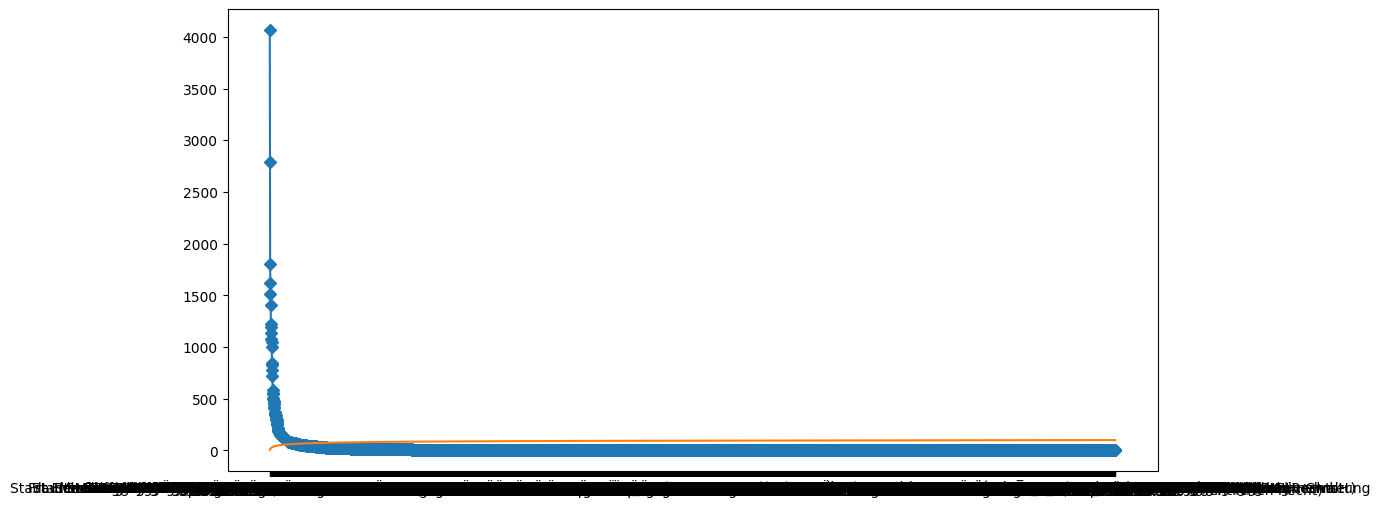

In [ ]:
plt.figure(figsize=(12,6))


plt.plot(newdf.index,newdf["anzahl_ladepunkte"], marker="D")
plt.plot(newdf.index,newdf["cum_percentage"])

#as soon as I plot bars the max value becomes smaller --- why?